In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

In [17]:
# Load the data.
df = pd.read_csv('../data/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.000,NaN,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.050,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q


In [18]:
df.shape

(891, 12)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
# Check for duplicate rows.
df.duplicated().sum()

np.int64(0)

In [22]:
# Check for missing values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Few conclusions
- There are missing values in the columns Age, Cabin and Embarked.
- More than 70% of the values in Cabin-column are missing so we'll drop it.
- Some columns have inappropriate data types (Pclass, Survived, Sex, Embarked, Age).

In [23]:
# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,C


#### Handling Missing Values

In [24]:
# Handling missing values in Embarked columm.
# -> As there are only 2 missing we'll replace them with mode.

mode_val = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_val) 

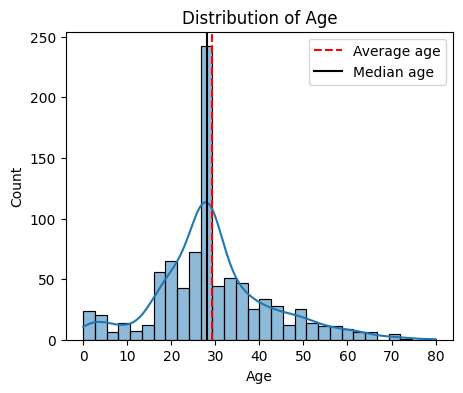

In [35]:
# Handling missing values in Age column.
# Based on the distribution of this column we'll decide 
# if we have to replace missing values with mean, median or use Model-based imputation.

mean_age = df['Age'].mean()    
median_age = df['Age'].median()

plt.figure(1, figsize=(5, 4))

sns.histplot(df['Age'], kde=True)
plt.axvline(x=mean_age, color='red', linestyle='--', label='Average age')
plt.axvline(x=median_age, color='black', linestyle='-', label='Median age')
plt.title('Distribution of Age')
plt.legend()

plt.show()

# Conclusion : The Age column is almost normally distributed.

In [26]:
# Imputing the Age column's missing values with median value
df['Age'] = df['Age'].fillna(median_age)

In [27]:
"""
Change the dtypes of columns :
    1. Pclass
    2. Survived
    3. Sex
    4. Embarked
    5. Age
    6. SibSp
    7. Parch
"""


df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Age'] = df['Age'].astype(np.int8)
df['SibSp'] = df['SibSp'].astype(np.int8)
df['Parch'] = df['Parch'].astype(np.int8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(1), int8(3), object(2)
memory usage: 34.6+ KB


In [29]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.345679,0.523008,0.381594,32.204208
std,257.353842,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


#### Univariate Analysis

38.38% of the passengers Survived



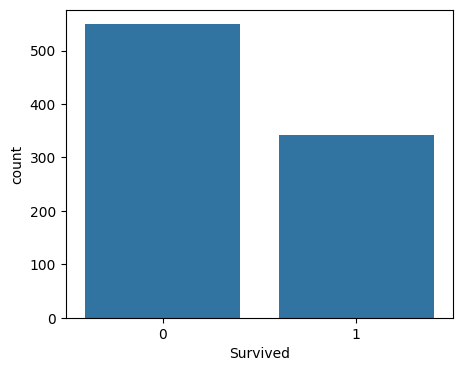

In [30]:
# Survived column
plt.figure(1, figsize=(5, 4))
percent = df['Survived'].value_counts()[1].sum()/len(df['Survived'])*100
print(f"{percent:.2f}% of the passengers Survived\n")
sns.countplot(x=df['Survived'])
plt.show()

Percentages of people in each class : 
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64
----------------------------------------
Average fare of each class
             Fare
Pclass           
1       84.154687
2       20.662183
3       13.675550


/tmp/ipykernel_5570/1147117710.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass').agg({'Fare':'mean'}))


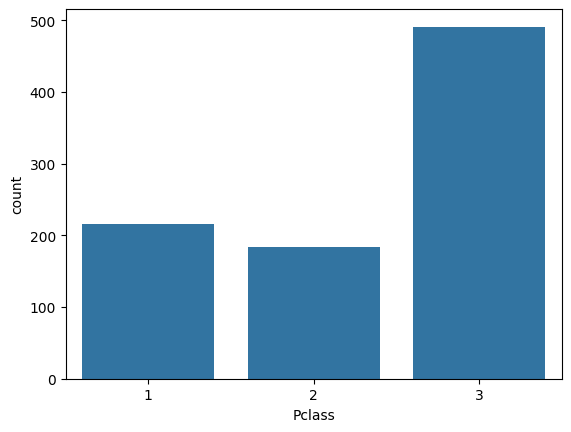

In [31]:
# Pclass
print('Percentages of people in each class : ')
print(df['Pclass'].value_counts()/891*100)
print('-'*40)
print('Average fare of each class')
print(df.groupby('Pclass').agg({'Fare':'mean'}))

sns.countplot(x=df['Pclass'])
plt.show()

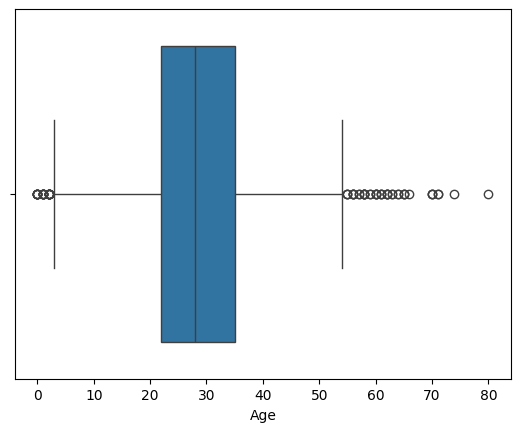

In [37]:
# Axge
# Boxplot to identify outliers
sns.boxplot(x = df['Age'])
plt.show()

# The Boxplot considers the people approximately above 55 as outliers

In [48]:
# Let's checkout some ranges of age which are considered as outliears in the above boxplot

print(f'No. of passengers in the age range of 60 to 70 : {(df[(df['Age']>=60) & (df['Age'] <= 70)].shape[0])}')
print(f'No. of passengers in the age range of 70 to 80 : {(df[(df['Age']>70) & (df['Age'] <= 80)].shape[0])}')

print(f'No. of passengers in the age range of 0 to 1 : {(df[(df['Age']>=0) & (df['Age'] <= 1)].shape[0])}')

# Conclusion : Every range has significant number of people so we cannot decide whether to remove the alleged 
# outliers or not yet. 

No. of passengers in the age range of 60 to 70 : 22
No. of passengers in the age range of 70 to 80 : 4
No. of passengers in the age range of 0 to 1 : 14


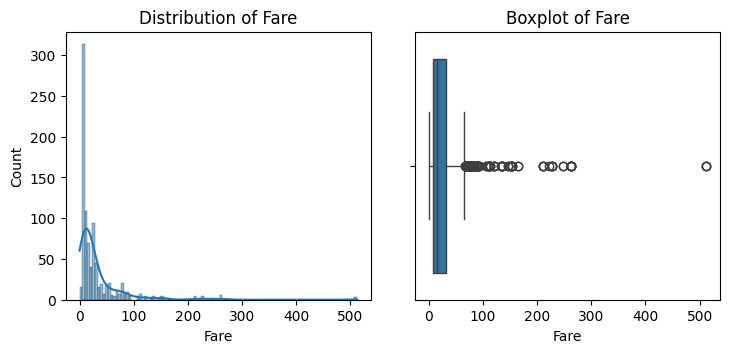

In [54]:
# Fare 
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
fig.tight_layout(pad=0.1)
axes = axes.flatten()

# Histogram
sns.histplot(df['Fare'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Fare')

# Boxplot
sns.boxplot(x=df['Fare'], ax=axes[1])
axes[1].set_title('Boxplot of Fare'
                 )
plt.show()

# Conclusions :
# 1. Very right skewed distribution.
# 2. There are outliers in the data

In [55]:
print(f'Skewness : {df['Fare'].skew()}')
print(f'Kurtosis : {df['Fare'].kurt()}')

Skewness : 4.787316519674893
Kurtosis : 33.39814088089868


#### Multivariate Analysis